In [142]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import math

In [143]:
#Organizing the data

data_set = np.genfromtxt("hw03_data_set.csv", delimiter= ",", skip_header = 1)
N = data_set.shape[0]
label_set = data_set[:,1]
data_set = data_set[:,0]

training = data_set[:150]
y_train = label_set[:150]
test = data_set[150:272]
y_test = label_set[150:272]



In [144]:
#Initializing the parameters
min_val = 1.5

max_val = max(training)
bin_width = 0.37
print(max_val)
data_interval = np.arange(min_val,max_val,0.01)

5.1


In [145]:
#Setting the borders

leftb = np.arange(min_val,max_val, bin_width)
rightb = np.arange(min_val + bin_width, max_val+bin_width, bin_width)

In [146]:
#Regressogram

g_x = np.zeros(len(leftb))
for i in range(len(rightb)):
    l1 = training < rightb[i]
    l2 = training > leftb[i]
    if len(training[l1 & l2]) != 0:
        g_x[i] = np.sum(y_train[l1 & l2])/len(training[l1 & l2])
    else:
        g_x[i] = np.nan


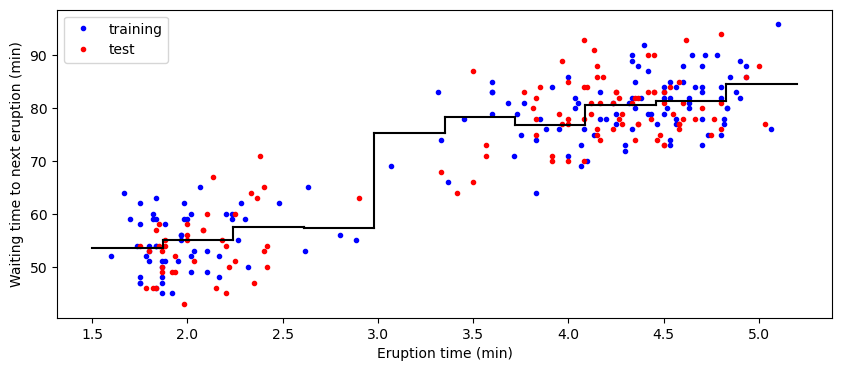

In [147]:
#Plotting
plt.figure(figsize = (10, 4))
plt.plot(training, y_train, 'b.')
plt.plot(test, y_test, 'r.')
for b in range(len(leftb)):
    plt.plot([leftb[b], rightb[b]], [g_x[b], g_x[b]], "k-")
for b in range(len(leftb) - 1):
    plt.plot([rightb[b], rightb[b]], [g_x[b], g_x[b + 1]], "k-")  
plt.legend(['training','test'])
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time to next eruption (min)')

plt.show()

In [148]:
# Calculating RSME
nob=leftb.shape[0]

y_hat=[y_train[(leftb[b]<training) & (rightb[b]>=training)] for b in range(nob)]
g1=[np.mean(y_hat[b]) for b in range(nob)]
count=np.asarray([np.sum((leftb[b]<test) & (rightb[b]>=test)) for b in range(nob)])
RMSE1=np.sqrt(
    np.sum(
        (y_test[np.argsort(test)]
        -np.concatenate([np.repeat(g1[b],count[b]) for b in range(nob)])
        )**2
            
        /y_test.shape[0]))
print('Regressogram => RSME is %.15f when h is %.2f' % (RMSE1,bin_width))

Regressogram => RSME is 5.962617204275405 when h is 0.37


In [149]:
# Running Mean Smoother
h=0.37
xline=np.linspace(h*0.5,max_val,1601)
y_hat2=[y_train[((x - 0.5 * h) < training) & (training <= (x + 0.5 * h))] for x in xline]
g2line=np.array([np.mean(y_hat2[x]) for x in range(1601)])


/Users/alpakkanlar/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alpakkanlar/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


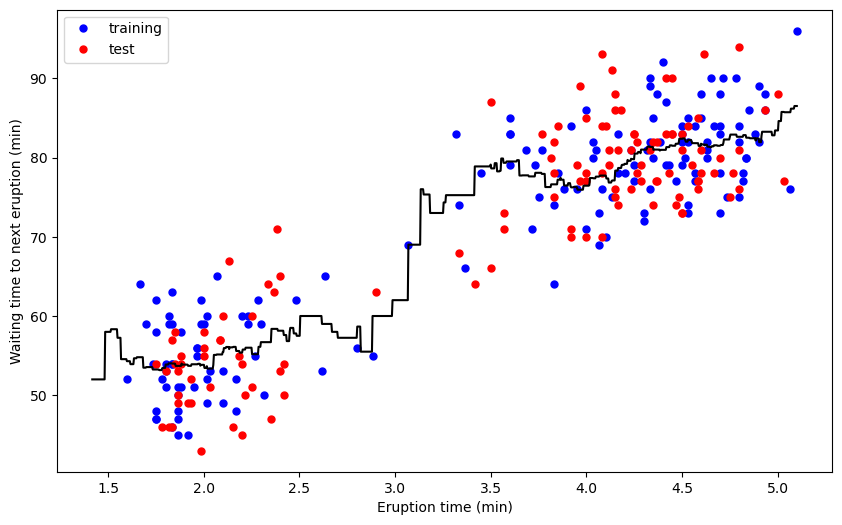

In [150]:
#Plotting
plt.figure(figsize = (10, 6))
plt.plot(training,y_train,".b",markersize=10,label="training")
plt.plot(test,y_test,".r",markersize=10,label="test")
plt.plot(xline,g2line, "k-") 
plt.legend(loc=2)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.show()


In [151]:
#CALCULATING RMSE FOR MEAN SMOOTHER
g_2=np.asarray([np.mean(y_train[((x - 0.5 * h) < training) & (training <= (x + 0.5 * h))]) for x in test])
RMSE2=np.sqrt(
    np.sum(
        (y_test-g_2)**2/y_test.shape[0]))

print("Running Mean Smoother => RMSE is", RMSE2, "when h is 0.37")

Running Mean Smoother => RMSE is 6.089003211720321 when h is 0.37


In [152]:
#KERNEL SMOOTHER
bin_width = 0.37
p_hat2 = np.array([np.sum((1 / np.sqrt(2 * math.pi)) * np.exp(-(((x - training) / bin_width) ** 2 / 2)) * y_train)
                  / np.sum((1 / np.sqrt(2 * math.pi)) * np.exp(-(((x - training) / bin_width) ** 2 / 2)))
                  for x in data_interval])


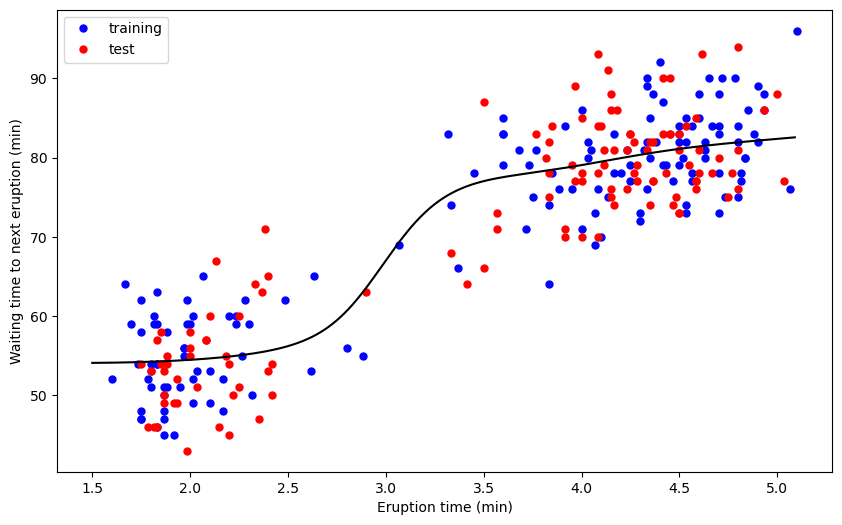

In [153]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(training, y_train, "b.", markersize=10)
plt.plot(test, y_test, "r.", markersize=10)
plt.plot(data_interval, p_hat2, "k-")
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(["training", "test"])
plt.show()


In [154]:
g3_ks = np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - training)**2 / h**2)*y_train)/
                   np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - training)**2 / h**2))for x in test]) 

RMSE3=np.sqrt(
    np.sum(
        (y_test-g3_ks)**2/y_test.shape[0]))

print("Kernel Smoother => RMSE is", RMSE3, "when h is 0.37")



Kernel Smoother => RMSE is 5.874362846844969 when h is 0.37
